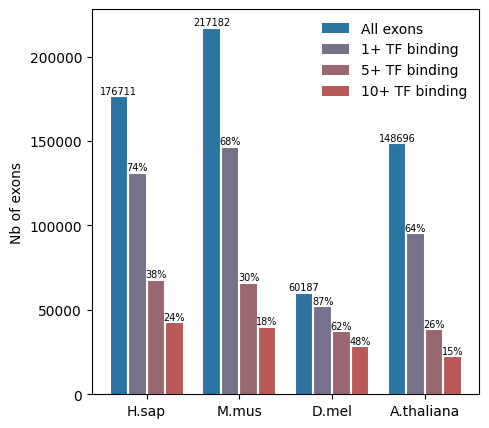

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

# Numbers  were obtained using the following example command :
#awk '{if ($11!="NA" && $11>=5) print $11}' hg38_coding_exons_bilan_ovlpTF_NR_cCREs_FANTOM5+Enh_NonCoding_TSS_TES_UTR5_UTR3_peakDensity_density50pb_AllSummitsPeaksDensitySum_correl_TLS1.bed |wc -l

dataf = [
{"Species":"H.sap","Exons":"All exons","Nb of exons":176711},
{"Species":"H.sap","Exons":"1+ TF binding","Nb of exons":131358},
{"Species":"H.sap","Exons":"5+ TF binding","Nb of exons":67827},
{"Species":"H.sap","Exons":"10+ TF binding","Nb of exons":42699},

{"Species":"M.mus","Exons":"All exons","Nb of exons":217182},
{"Species":"M.mus","Exons":"1+ TF binding","Nb of exons":146706},
{"Species":"M.mus","Exons":"5+ TF binding","Nb of exons":66169},
{"Species":"M.mus","Exons":"10+ TF binding","Nb of exons":40082},

{"Species":"D.mel","Exons":"All exons","Nb of exons":60187},
{"Species":"D.mel","Exons":"1+ TF binding","Nb of exons":52412},
{"Species":"D.mel","Exons":"5+ TF binding","Nb of exons":37551},
{"Species":"D.mel","Exons":"10+ TF binding","Nb of exons":28590},

{"Species":"A.thaliana","Exons":"All exons","Nb of exons":148696},
{"Species":"A.thaliana","Exons":"1+ TF binding","Nb of exons":95598},
{"Species":"A.thaliana","Exons":"5+ TF binding","Nb of exons":38481},
{"Species":"A.thaliana","Exons":"10+ TF binding","Nb of exons":22613},
]

df = pd.DataFrame(dataf)

plt.figure(figsize=(5,5))

ax = sns.barplot(
    data=df,
    x="Species",
    y="Nb of exons",
    hue="Exons",
    palette=["#1878b6", "#746d8f", "#a05f6b", "#c84847"],
    edgecolor="none"    # Turn off default edges
)

# Manually draw white borders (top, left, right only)
for container in ax.containers:            # Each "container" is one hue group
    for bar in container.patches:          # Each bar is a Rectangle
        x, y = bar.get_xy()
        width = bar.get_width()
        height = bar.get_height()
        
        # Top edge
        ax.plot([x, x + width], [y + height, y + height],
                color="white", linewidth=1.5, zorder=10)
        # Left edge
        ax.plot([x, x], [y, y + height],
                color="white", linewidth=1.5, zorder=10)
        # Right edge
        ax.plot([x + width, x + width], [y, y + height],
                color="white", linewidth=1.5, zorder=10)

# Make list of labels in % 
lab_list=[176711,131358,67827,42699,217182,146706,66169,40082,60187,52412,37551,28590,148696,95598,38481,22613]
tot_val = [176711,217182,60187,148696]
list_perc = {}

cpt = 0 
cpt2 = 0
for i in lab_list:
    absolute = round((i*100)/tot_val[cpt])
    cpt2 += 1
    if cpt2 ==4:
        cpt2 =0
        cpt +=1
    list_perc[i] = str(absolute)+"%"

for rect in ax.containers:
    for bar in rect:
        height = bar.get_height()

        if str(height) == "176711.0" or str(height) == "217182.0" or str(height) == "60187.0" or str(height) == "148696.0":
            lab = str(height).split(".")[0]
            ax.text(bar.get_x() + bar.get_width()/2, height, lab, ha='center', va='bottom',size=7,zorder=15)  
        else:
            ax.text(bar.get_x() + bar.get_width()/2, height, list_perc[height], ha='center', va='bottom',size=7,zorder=15)

plt.legend(frameon=False)
plt.gca().set(ylabel = "Nb of exons")
plt.gca().set(xlabel = None)

"""plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)"""


plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/nb_tf_ovlp_all_species.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig1/nb_tf_ovlp_all_species.png", format="png", bbox_inches="tight", dpi=450)

plt.show()